In [1]:
ls

1.ipynb                          Patrick_ProjectMileStone2.ipynb
Neilsens.csv                     Untitled.ipynb
Patrick_MileStone1.ipynb         full_extract.csv*


In [2]:
import pandas as pd

In [3]:
data = 'full_extract.csv'
tweets = pd.read_csv(data)

In [4]:
tweets.head()

,StateID,State,TweetID,CreatedDate,Lat,Lon,TwitterUserID,TwitterName,Followers,ShowID,ShowName
0,5,Nevada,450090458492854273,2014-03-29 22:01:42-04:00,36.173445,-115.061502,151680843,NUEMONEY,25485,2,Davincis Demons
1,7,New York,450089210834612224,2014-03-29 21:56:44-04:00,40.912401,-73.812712,155094607,Richie_Staz,497,2,Davincis Demons
2,5,Nevada,450108336025780225,2014-03-29 23:12:44-04:00,36.173445,-115.061502,151680843,NUEMONEY,25485,2,Davincis Demons
3,13,Texas,450072139006099456,2014-03-29 20:48:54-04:00,31.889186,-98.625780,2400672156,JadedSch,23,2,Davincis Demons
4,29,Georgia,450090930415370240,2014-03-29 22:03:34-04:00,33.777556,-84.384069,526761281,daylabaldwin,31,2,Davincis Demons


In [5]:
tweets['CreatedDate'] = pd.to_datetime(tweets['CreatedDate'])

In [13]:
game_of_thrones_tweets = tweets[(tweets['ShowName'] == 'Game of Thrones') & (tweets['CreatedDate'].dt.date == pd.to_datetime('2014-04-20').date())]

In [14]:
time_slots = {
    'before': ('2014-04-20 18:00:00', '2014-04-20 20:59:59'),
    'during': ('2014-04-20 21:00:00', '2014-04-20 21:59:59'),
    'after': ('2014-04-20 22:00:00', '2014-04-20 23:59:59')
}

In [15]:
time_slot_data = {}
for slot, (start, end) in time_slots.items():
    filtered_tweets = game_of_thrones_tweets[(game_of_thrones_tweets['CreatedDate'] >= start) & (game_of_thrones_tweets['CreatedDate'] <= end)]
    tweet_count = filtered_tweets.shape[0]
    time_slot_data[slot] = tweet_count

In [16]:
print("Number of tweets for 'Game of Thrones' on April 20 by time slot:")
for slot, count in time_slot_data.items():
    print(f"{slot.capitalize()} the show: {count} tweets")

Number of tweets for 'Game of Thrones' on April 20 by time slot:
Before the show: 9964 tweets
During the show: 5820 tweets
After the show: 10361 tweets


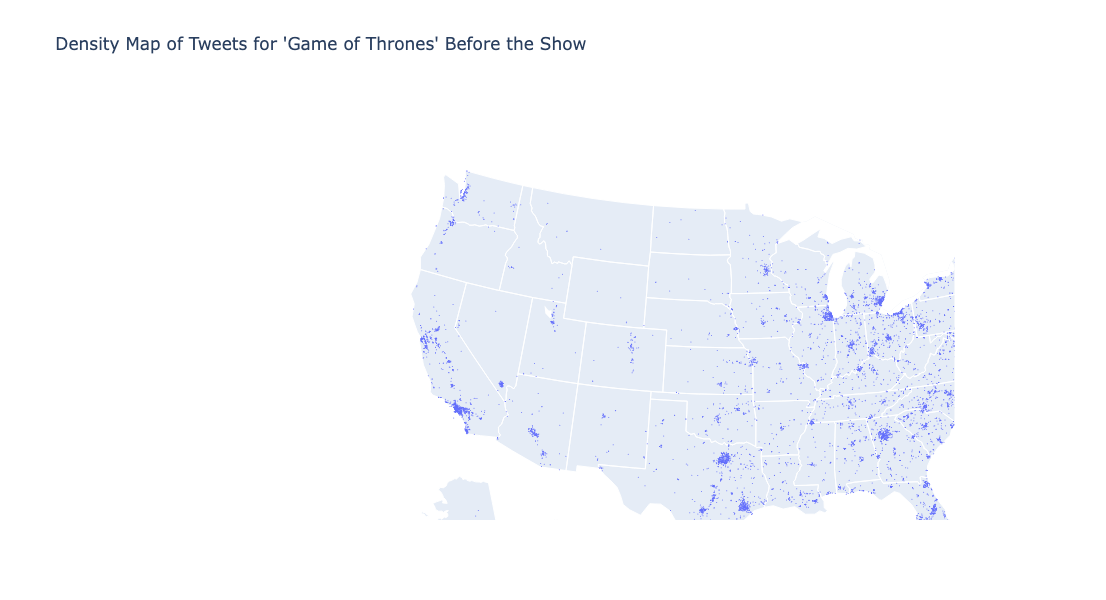

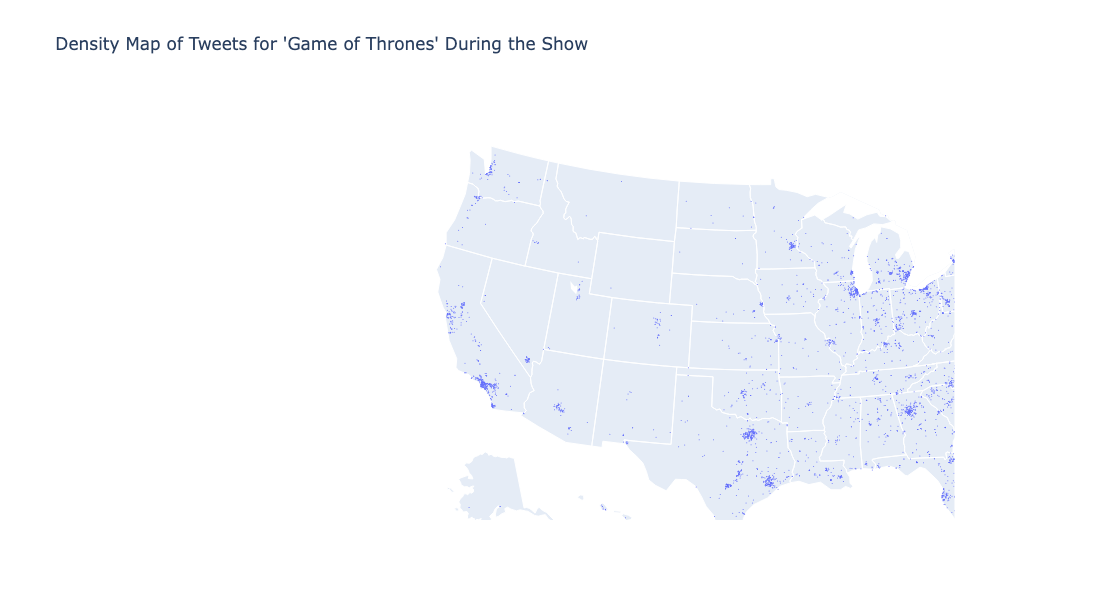

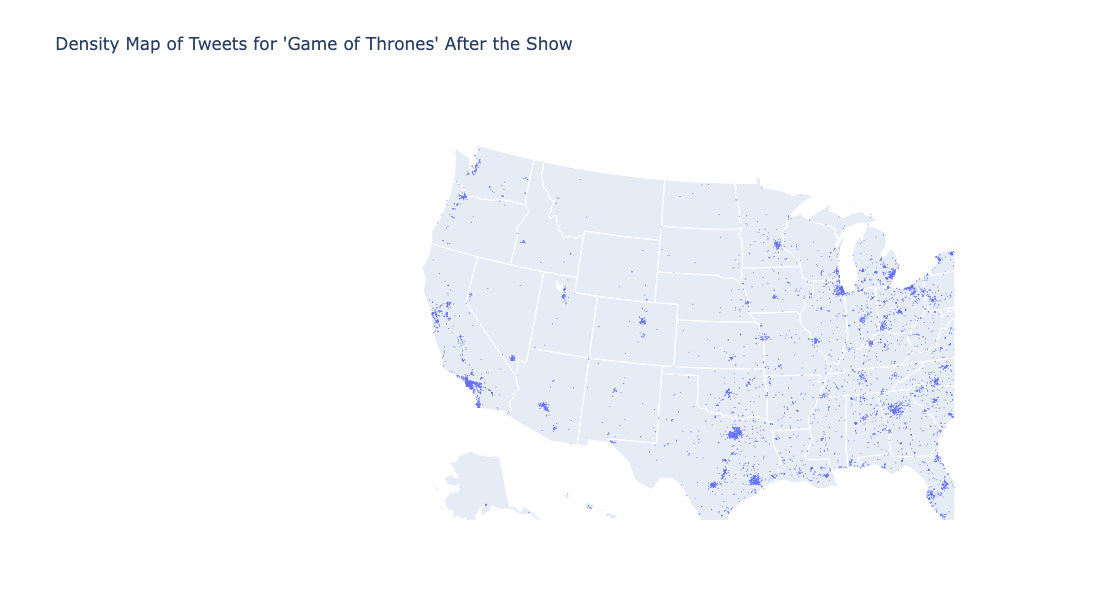

In [36]:
import plotly.express as px


def create_density_map(data, title):
    fig = px.scatter_geo(data,
                         lat='Lat',
                         lon='Lon',
                         scope='usa',
                         hover_name='CreatedDate',  
                         title=title,
                         )
    fig.update_geos(fitbounds="locations")
    fig.update_traces(marker=dict(size=1))
    fig.update_layout(
    
    width=800,
    height=600
)
    fig.show()


for slot, (start, end) in time_slots.items():
    filtered_tweets = game_of_thrones_tweets[(game_of_thrones_tweets['CreatedDate'] >= start) & (game_of_thrones_tweets['CreatedDate'] <= end)]
    create_density_map(filtered_tweets, f"Density Map of Tweets for 'Game of Thrones' {slot.capitalize()} the Show")


In [41]:
tweets['CreatedDate'] = pd.to_datetime(tweets['CreatedDate'])

\
dancing_tweets = tweets[(tweets['ShowName'] == 'Dancing with the Stars') & (tweets['CreatedDate'].dt.date == pd.to_datetime('2014-04-14').date())]

# Define time slots
time_slots = {
    'before': ('2014-04-14 17:00:00', '2014-04-14 19:59:59'),
    'during': ('2014-04-14 20:00:00', '2014-04-14 21:59:59'),
    'after': ('2014-04-14 22:00:00', '2014-04-14 23:59:59')
}

time_slot_data = {}
for slot, (start, end) in time_slots.items():
    filtered_tweets = dancing_tweets[(dancing_tweets['CreatedDate'] >= start) & (dancing_tweets['CreatedDate'] <= end)]
    tweet_count = filtered_tweets.shape[0]
    time_slot_data[slot] = tweet_count

print("Number of tweets for 'Dancing with the Stars' on April 14 by time slot:")
for slot, count in time_slot_data.items():
    print(f"{slot.capitalize()} the show: {count} tweets")


Number of tweets for 'Dancing with the Stars' on April 14 by time slot:
Before the show: 222 tweets
During the show: 1848 tweets
After the show: 629 tweets


In [42]:
tweets['CreatedDate'] = pd.to_datetime(tweets['CreatedDate'])

\
walking_tweets = tweets[(tweets['ShowName'] == 'The Walking Dead') & (tweets['CreatedDate'].dt.date == pd.to_datetime('2014-03-30').date())]

# Define time slots
time_slots = {
    'before': ('2014-03-30 17:54:59', '2014-03-30 20:59:59'),
    'during': ('2014-03-30 21:00:00', '2014-03-30 21:59:59'),
    'after': ('2014-03-30 22:00:00', '2014-03-30 23:59:59')
}

time_slot_data = {}
for slot, (start, end) in time_slots.items():
    filtered_tweets = walking_tweets[(walking_tweets['CreatedDate'] >= start) & (walking_tweets['CreatedDate'] <= end)]
    tweet_count = filtered_tweets.shape[0]
    time_slot_data[slot] = tweet_count

print("Number of tweets for 'The Walking Deads' on March 30 by time slot:")
for slot, count in time_slot_data.items():
    print(f"{slot.capitalize()} the show: {count} tweets")

Number of tweets for 'The Walking Deads' on March 30 by time slot:
Before the show: 1739 tweets
During the show: 3026 tweets
After the show: 2169 tweets
